# Gaussian mixture model

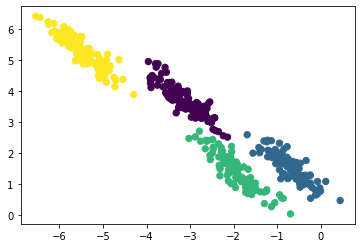

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
X = X_stretched
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')

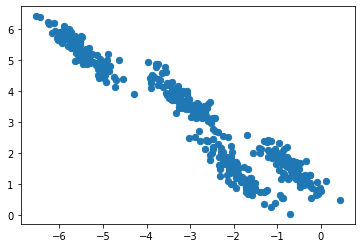

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis')

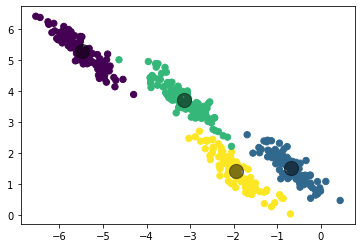

In [7]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4).fit(X)
y_pred = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')
plt.scatter(gm.means_[:,0], gm.means_[:,1], c='black', alpha=0.5, s=200)

In [8]:
gm.predict_proba(X)

array([[4.24694828e-01, 1.57994870e-22, 5.75304914e-01, 2.57944314e-07],
       [1.90814985e-17, 4.53919898e-15, 1.04252794e-09, 9.99999999e-01],
       [2.34256127e-14, 2.93178588e-17, 2.32161496e-09, 9.99999998e-01],
       ...,
       [1.08098592e-36, 9.99999921e-01, 5.86977056e-08, 2.06417821e-08],
       [2.07821849e-15, 3.68676276e-04, 5.52258023e-01, 4.47373301e-01],
       [3.76421492e-47, 1.00000000e+00, 1.75605349e-11, 5.76719453e-14]])

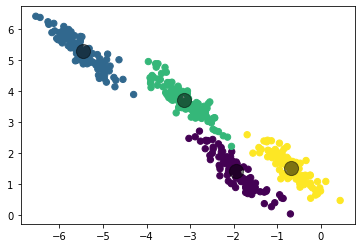

In [9]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, covariance_type='tied').fit(X)
y_pred = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')
plt.scatter(gm.means_[:,0], gm.means_[:,1], c='black', alpha=0.5, s=200)

In [6]:
gm.predict([[-6,4], [-3, 4], [-2, 2], [0, 2]])

array([1, 2, 0, 3], dtype=int64)

---

# Task: Implement Gaussian Mixture Model without sklearn

## Run it on the data generated above and plot the results

In [10]:
import scipy
import random 
import numpy as np
import math

In [11]:
centers = random.sample(list(X),4) # i took list of X since random.sample doesn't work for numpy arrays
centers

[array([-3.25088975,  3.61737181]),
 array([-5.74347413,  5.38591686]),
 array([-3.92087491,  4.42278057]),
 array([-5.23684111,  4.92696752])]

In [12]:
k = 4

In [15]:
gammasIK = [[0 for i in range(k)] for i in range(len(X))]
classNumber = k
mean = [[random.random(),random.random()] for i in range(k)]
covariance = [random.random() for i in range(k)]
pi = [1/classNumber for i in range(k)]
sum_ =0
Nk = [0 for i in range(k)]
for i in range(len(X)):
    for j in range(k):
        sum_+= pi[j]*scipy.stats.multivariate_normal(mean[j], covariance[j]).pdf(X[i])
    for j in range(k):
        gammasIK[i][j]=(pi[j]*scipy.stats.multivariate_normal(mean[j], covariance[j]).pdf(X[i])/(sum_)) 
    sum_=0
for j in range(k):
    for i in range(len(X)):
        sum_+=gammasIK[i][j]*X[i]
    mean[j]= sum_/(pi[j]*len(X))
sum_ = 0
for j in range(k):
    for i in range(len(X)):
        sum_+=gammasIK[i][j]*(X[i]-mean[j])@np.transpose(X[i]-mean[j])
    covariance[j]= sum_/(pi[j]*len(X))
sum_= 0
for i in range(len(Nk)):
    for j in range(len(X)):
        sum_+= gammasIK[j][i]
    Nk[i] = sum_
for i in range(k):
    pi[i] = Nk[i]/len(X)
lastLoss = Loss(X, mean, covariance,pi)-0.7 #so that boolean in while will be true
currentLoss = Loss(X, mean, covariance,pi) 


    

    
    
    
        
        
    

In [14]:
def Loss(x,mean, covariance,pi):# i return loss function without logarithm
    sum_ = 0
    product1 = 1
    for i in range(len(x)):
        for j in range(k):
            sum_+=  pi[j]*scipy.stats.multivariate_normal(mean[j], covariance[j]).pdf(X[i])
        product1*=sum_
    return(product1)
    

In [16]:
while currentLoss-lastLoss>0.05:
    lastLoss = currentLoss
    for i in range(len(X)):
        for j in range(k):
            sum_+= pi[j]*scipy.stats.multivariate_normal(mean[j], covariance[j]).pdf(X[i])
        for j in range(k):
            gammasIK[i][j]=(pi[j]*scipy.stats.multivariate_normal(mean[j], covariance[j]).pdf(X[i])/(sum_)) 
        sum_=0
    for j in range(k):
        for i in range(len(X)):
            sum_+=gammasIK[i][j]*X[i]
        mean[j]= sum_/(pi[j]*len(X))
    sum_ = 0
    for j in range(k):
        for i in range(len(X)):
            sum_+=gammasIK[i][j]*(X[i]-mean[j])@np.transpose(X[i]-mean[j])
        covariance[j]= sum_/(pi[j]*len(X))
    sum_= 0
    for i in range(len(Nk)):
        for j in range(len(X)):
            sum_+= gammasIK[j][i]
        Nk[i] = sum_
    for i in range(k):
        pi[i] = Nk[i]/len(X)
    currentLoss = Loss(X, mean, covariance,pi) 
    

In [17]:
y_pred = [0 for i in range(len(X))]
for i in range(len(X)):
    max_ = 0
    for j in range(k):
         if(max_< gammasIK[i][j]):
                y_pred[i] = j
    

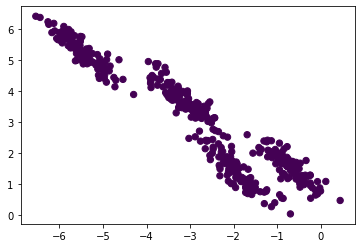

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis')